Задача 1

Даны значения зарплат из выборки выпускников:

100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150

Используя только встроенные питоновские функции и структуры данных (т.е. без библиотек numpy, pandas и др.) посчитать среднее арифметическое, смещённую и несмещённую оценки дисперсии, среднее квадратичное отклонение для данной выборки.

Можно затем посчитать те же значения с использованием библиотек, чтобы проверить себя.

In [1]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [2]:
len(a)

21

In [3]:
sum = 0

In [10]:
for i in range(len(a)):
    sum = sum + a[i]
print(sum)

1536


In [11]:
average = sum/len(a)

In [17]:
average

73.14285714285714

Проверка: 

In [23]:
import numpy as np
import math

In [26]:
np.mean(a)

73.14285714285714

среднее квадратичное отклонение

In [ ]:
x = []

In [29]:
for i in range(len(a)):
    buf_x = (a[i] - average)**2


In [32]:
buf_x = [(a[i]-average)**2 for i in range(len(a))]

In [33]:
buf_x

[721.3061224489799,
 47.02040816326536,
 3.44897959183675,
 14.877551020408195,
 251.44897959183686,
 1611.4489795918364,
 792.0204081632651,
 2317.734693877551,
 66.30612244897952,
 3152.020408163265,
 1861.3061224489793,
 24604.163265306124,
 2415.020408163265,
 260.59183673469374,
 329.1632653061223,
 9.877551020408138,
 3.44897959183675,
 66.30612244897952,
 117.87755102040825,
 284.1632653061226,
 5907.0204081632655]

In [34]:
sum_buf_x = 0 
for i in range(len(buf_x)):
    sum_buf_x += buf_x[i]

In [35]:
sum_buf_x

44836.571428571435

In [37]:
sigma = (sum_buf_x/len(buf_x))**0.5
print(sigma)

46.20686994302874


Проверка

In [38]:
np.std(a)

46.206869943028735

Смещённая и несмещённая оценка дисперсии

In [39]:
sigma_sm = sum_buf_x/len(buf_x)

In [40]:
sigma_sm

2135.074829931973

In [41]:
sigma_nesm = sum_buf_x/(len(buf_x) - 1)

In [42]:
sigma_nesm

2241.8285714285716

Проверка: 

In [47]:
np.var(a)

2135.0748299319725

In [48]:
np.var(a, ddof=1)

2241.828571428571

Задача 2

Для выборки из задачи 1 найти (также без использования библиотек):
1. медиану, первый и третий квартили, интерквартильное расстояние,
2. выбросы в выборке (используя для этого метод как при построении "усов" из boxplot).

Возможные неоднозначности в вычислении квантилей можно разрешать любым способом.

In [51]:
a = [100, 80, 75, 77, 89, 33, 45, 25, 65, 17, 30, 230, 24, 57, 55, 70, 75, 65, 84, 90, 150]

In [52]:
n = len(a)
for i in range(n):
    for j in range(n-i-1):
        if a[j] > a[j+1]:
            a[j], a[j+1] = a[j+1], a[j]

In [53]:
a

[17,
 24,
 25,
 30,
 33,
 45,
 55,
 57,
 65,
 65,
 70,
 75,
 75,
 77,
 80,
 84,
 89,
 90,
 100,
 150,
 230]

In [54]:
n

21

Первый квартиль: 

In [61]:
N_kvart_1 = (n+1)/4

In [62]:
N_kvart_1

5.5

In [91]:
kvart_1 = a[5] + (a[6]-a[5])/4

In [92]:
kvart_1

47.5

Второй квартиль(медиана): 

In [80]:
N_kvart_2 = 2*(n+1)/4

In [81]:
N_kvart_2

11.0

In [82]:
a[11]

75

Третий квартиль:

In [83]:
N_kvart_3 = 3*(n+1)/4

In [84]:
N_kvart_3

16.5

In [85]:
kvart_3 = a[16] + (a[17]-a[16])/4

In [86]:
kvart_3

89.25

In [98]:
IQR = kvart_3-kvart_1

In [99]:
IQR

41.75

In [100]:
out_1 = kvart_1 - 1.5*IQR 

In [102]:
out_1

-15.125

In [104]:
out_2 = kvart_3 + 1.5*IQR

In [105]:
out_2

151.875

"Снизу" выбросов нет. А вот сверху есть. Он один и равен 230. 

Проверка. Почему поехали квантили, я так и не понял: 

In [95]:
np.quantile(a, 0.25)

45.0

In [96]:
np.quantile(a, 0.75)

84.0

In [97]:
np.quantile(a, 0.5)

70.0

In [106]:
import seaborn as sns

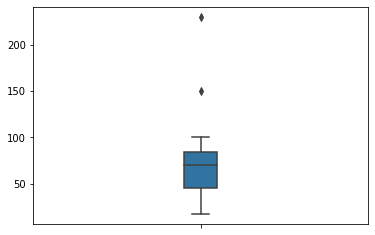

In [108]:
sns.boxplot(a, orient='v', width=0.1)

Согласно "усам" у нас два выброса: 150 и 230. Где же я тогда ошибся? Жду разбор... 

Увидел в условии неоднозначность. Тем более, жду разбор. 

Задача 3

В университет на факультеты A и B поступило равное количество студентов, а на факультет C студентов поступило столько же, сколько на A и B вместе. Вероятность того, что студент факультета A сдаст первую сессию, равна 0.8. Для студента факультета B эта вероятность равна 0.7, а для студента факультета C - 0.9. Студент сдал первую сессию. Какова вероятность, что он учится: a) на факультете A? б) на факультете B? в) на факультете C?

Замечание: да, эта задача не на тему описательных статистик, но тема важная, и её стоит иногда освежать в памяти.

$$Решение$$ 

Допустим, на факультете A учится a студентов. Тогда на факультете B - также a. На факультете С - 2а. Сумма всех студентов = 4а.  

Тогда вероятность распределения по факультетам: 25%, 25%, 50%. 

In [111]:
depart_prob = np.array([0.25, 0.25, 0.5])

Вероятность сдачи экзаменов студентами: 

In [118]:
passed_ex = np.array([0.8, 0.7, 0.9])

Задача, скорее всего, на Формулу Байеса. Поскольку студент сдал экзамен (событие произошло), нужно найти вероятность с какого он факультета. 

Полная вероятность: 

In [119]:
full_prob = np.dot(depart_prob, passed_ex)

In [120]:
prob_abc = [passed_ex[i]*depart_prob[i]/full_prob for i in range(len(depart_prob))]

In [121]:
prob_abc

[0.24242424242424246, 0.21212121212121213, 0.5454545454545455]

Искомые вероятности - выше. Их сумма как и полагается равна 1. 